kNN Assignment - Avery Anderson 
Question 0:

What is the difference between regression and classification?
Regression is working to try and predict a value, while classification is an attempt to predict a class. For example, in class we looked at how regression can be used to try and predict the price of a car, while classifcation would be used to predict the model of the car

What is a confusion table? What does it help us understand about a model's performance?
A confusion table is a cross-tabulation of predicted and actual values. It can be used to help see how accurate the model is at predicting outcomes of the existing dataset

What does the SSE quantify about a particular model?
The SSE is the sum of the squared error. To get the SSE, its the squared difference between the predicted and actual outcomes for each point summed together. The lowest SSE indicates the best model to use. 

What are overfitting and underfitting?
Overfitting is creating a model too complex to accurately predict other outcomes. This model would essentially be doing too much to fit the existing data, that is becomes unreliable for future points. Underfitting is the opposite and is the result of creating a model for prediction that is way too simple to be accurate. 

Why does splitting the data into training and testing sets, and choosing by evaluating accuracy or SSE on the test set, improve model performance?
The splitting of data strategy to create a model is able to improve model performance because it allows you to test a model on data that it has not seen. By creating the model based on a smaller portion of the data, you maintain another set of data that you can use to check the accuracy of your model knowing that the model has not seen these data points before. 

With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.
When a class label is reported as a prediciton, that is the clearest and easiest way for it to be understood. However, by simply giving something a predicted label, you lose some of the nuances of the prediction's accuracy. The  probability distribution may not give as straight forward of an answer, but it can show the likelihood of accuracy for the prediction model. 

Question 1: 

Split the sample into ~80% for training and ~20% for evaluation.
Use the NN algorithm and the training data to predict price using year and mileage for the test set for . For each value of , compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase ?
Determine the optimal  for these data.
Describe what happened in the plots of predicted versus actual prices as  varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

Load the ./data/USA_cars_datasets.csv. Keep the following variables and drop the rest: price, year, mileage. Are there any NA's to handle? Look at the head and dimensions of the data.

In [27]:
import numpy as np # Import the numpy package into your workspace
import matplotlib.pyplot as plt # Import matplotlib into your workspace
import pandas as pd  # Import the pandas package into your workspace
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv('/Users/averyanderson/Desktop/data/USA_cars_datasets.csv',low_memory=False) #read in data

In [3]:
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [9]:
df_clean = df[["price", "year", "mileage"]]
df_clean.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [13]:
print(df_clean.shape, '\n') # List the dimensions of df
print(df_clean.dtypes, '\n') # The types of the variables
print(df_clean.columns, '\n') # Column names

(2499, 3) 

price      int64
year       int64
mileage    int64
dtype: object 

Index(['price', 'year', 'mileage'], dtype='object') 



Maxmin normalize year and mileage.

In [19]:
gdf = df_clean.loc[:,['price','year','mileage']]
gdf = gdf.rename(columns={'year':'x1', 'mileage':'x2'})

def maxmin(z):
    w = (z-np.min(z))/(np.max(z)-np.min(z))
    return w

gdf['x1'] = maxmin(gdf['x1'])
gdf['x2'] = maxmin(gdf['x2'])

gdf.head()

,price,x1,x2
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


Split the sample into ~80% for training and ~20% for evaluation.

In [23]:
y = gdf['price'] # Create target variable vector
X = gdf.loc[:,['x1','x2']] # Create feature matrix


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes

Use the NN algorithm and the training data to predict price using year and mileage for the test set for . For each value of , compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase ?

In [47]:
def statics(k=3,data=df): # function to test k
    y = gdf['price'] # Create target variable vector
    X = gdf.loc[:,['x1','x2']] 
    model = KNeighborsRegressor(n_neighbors=k) # Create a sk model for k=3
    fitted_model = model.fit(X,y) # Train the model on our data
    N_x = 100 # Coarseness of x variable
    N_y = 100 # Coarseness of y variable
    total = N_x*N_y # Total number of points to plot
    grid_x = np.linspace(0,1,N_x) # Create a grid of x values
    grid_y = np.linspace(0,1,N_y) # Create a grid of y values
    xs, ys = np.meshgrid(grid_x,grid_y) # Explode grids to all possible pairs
    X = xs.reshape(total) # Turns pairs into vectors
    Y = ys.reshape(total) # Turns pairs into vectors
    x_hat = pd.DataFrame({'x1':X,'x2':Y}) # Create a dataframe of points to plot
    y_hat = fitted_model.predict(x_hat) # Fit the model to the points
    x_hat['Predicted Price'] = y_hat # Add new variable to the dataframe
    this_plot = sns.scatterplot(data=x_hat,x='x1',y='x2',
                                hue='Predicted Price',palette='crest',linewidth=0) 
    sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) 

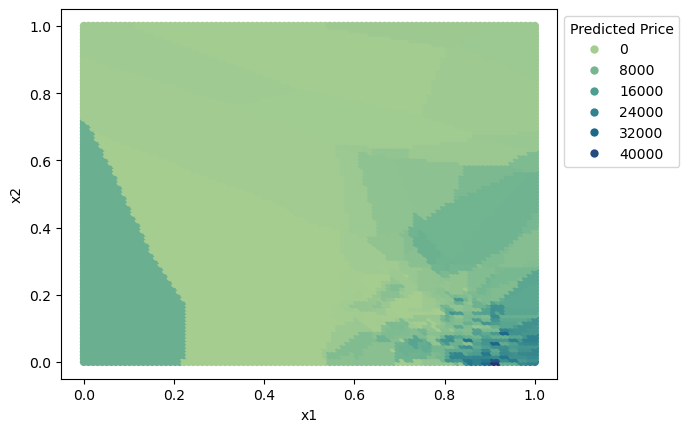

In [49]:
statics(3)

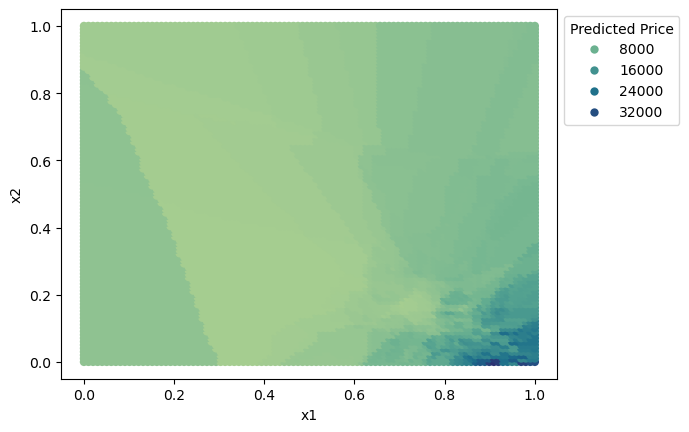

In [51]:
statics(10)

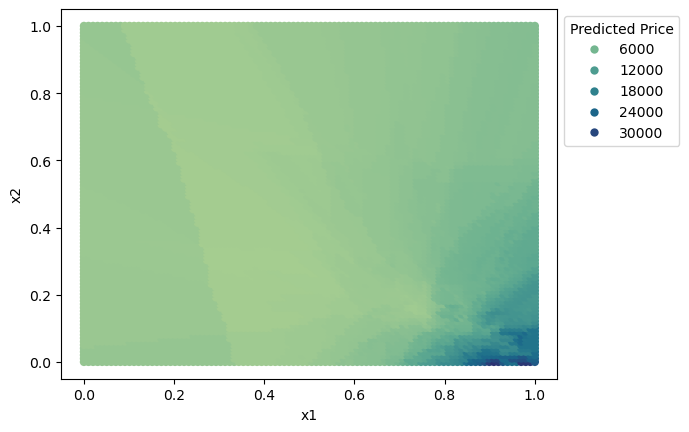

In [53]:
statics(25)

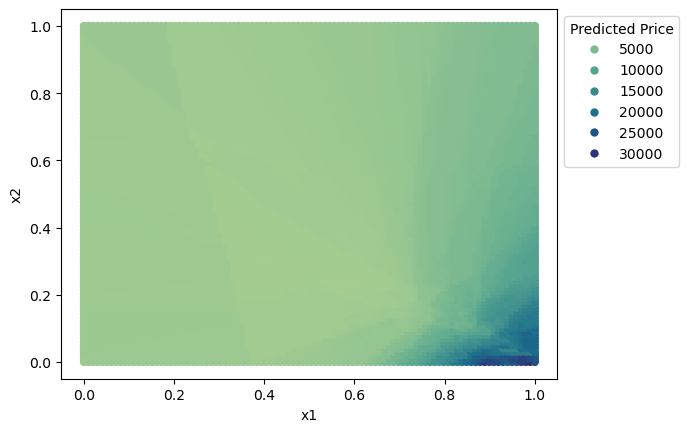

In [55]:
statics(50)

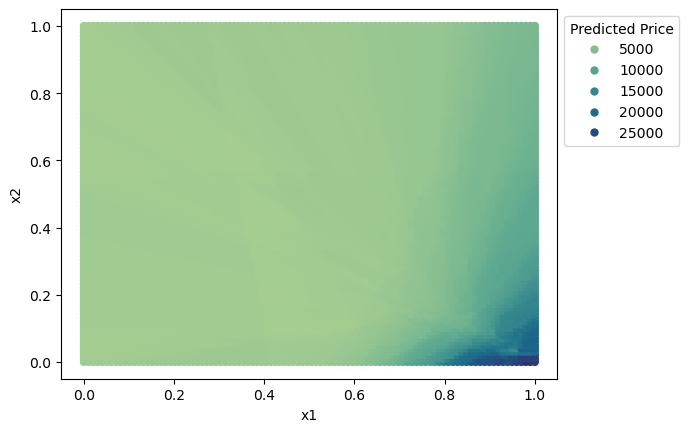

In [57]:
statics(100)

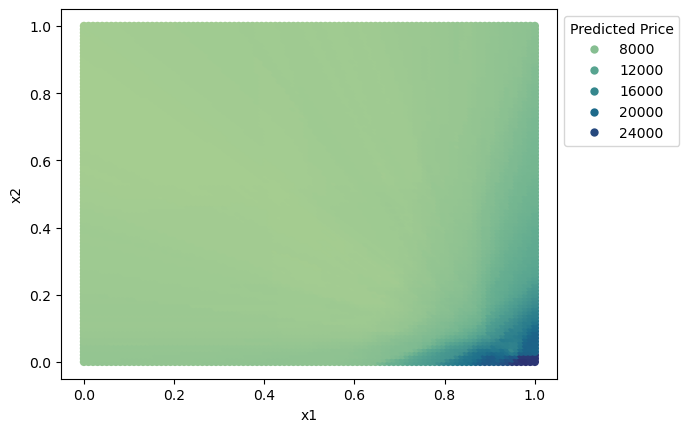

In [59]:
statics(300)

As I increase k, the variance in predicted values decreasing significantly and the different areas of prediction become unclearer to see

Determine the optimal k for these data.
28

In [64]:
k_bar = 75 # Number of k's to try
SSE = [] 
SSE_on_train = [] 

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE.append(np.sum( (y_test-y_hat)**2 )) # Save the computed SSE for test set
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_on_train.append( np.sum( (y_train-y_hat)**2 ) ) # Save the computed SSE

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum
k_star = min_index[0]+1 # Find the optimal value of k; why index+1?
print(k_star)

[28]


Describe what happened in the plots of predicted versus actual prices as k varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)
As k increased, the number of datapoints being used to create the model increased. This can lead to extreme overfitting especially as we get up past 100. We saw the model work to try and fit to more and more datapoints and as a result becomes an unrealiable and overcomplicated predictor. The same can happen when we do not use enough Ks and create too simple of a model that is vulnerable to underfitting, which can also give us an inaccurate model. The risks of over and under fitting our prediction model is why we work to find the best k value that is a balance between both. 